<a href="https://colab.research.google.com/github/routb68/PRML_Projects/blob/main/kernel_pca-projections-of-pc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [135]:
import numpy as np
import matplotlib.pyplot as plt 
from keras.datasets import mnist

In [136]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [137]:
x_train = x_train.reshape(60000, 784) # reshape 60,000 28 x 28 matrices into 60, 000 784-length vectors.
x_test = x_test.reshape(10000, 784) # reshape 10,000 28 x 28 matrices into 10, 000 784-length vectors.
print("x_train matrix shape", x_train.shape)
print("x_test matrix shape", x_test.shape)

x_train matrix shape (60000, 784)
x_test matrix shape (10000, 784)


In [138]:
np_x_train = np.array(x_train)
np_x_test = np.array(x_test)

In [139]:
print("np_x_train shape", np_x_train.shape)
print("np_x_train[0] datatype", np_x_train[0].dtype)

np_x_train shape (60000, 784)
np_x_train[0] datatype uint8


In [140]:
np_x_train = np_x_train.astype(np.float64)
np_x_test = np_x_test.astype(np.float64)
print("np_x_train[0] datatype", np_x_train[0].dtype)

np_x_train[0] datatype float64


In [141]:
transposearray=np.transpose(np_x_train)

print(np_x_train.shape)

(60000, 784)


In [142]:
print(transposearray.shape)

(784, 60000)


In [143]:
k=np.matmul(transposearray,np_x_train)

print(k.shape)

(784, 784)


In [144]:
for i in range(784):
    for j in range(784):
        k[i][j]+=1
for i in range(784):
    for j in range(784):
        k[i][j]=k[i][j]*k[i][j]
I=np.identity(784) 
div=1/784
divmat=np.full((784,784), div)
matminus = np.subtract(I, divmat) 
f=np.matmul(matminus, k)
kernalcent=np.matmul(f, matminus)

In [145]:
print(I.shape)
print(div)
print(divmat.shape)
print(matminus.shape)
print(f.shape)
print(kernalcent.shape)

(784, 784)
0.0012755102040816326
(784, 784)
(784, 784)
(784, 784)
(784, 784)


In [146]:
eig_vals, eig_vecs = np.linalg.eig(kernalcent)

In [147]:
print(eig_vals.shape)
for i in range (784):
  print(f"{i+1} th eigen value is - {np.real(eig_vals[i])}")

(784,)
1 th eigen value is - 7.772502032820558e+19
2 th eigen value is - 2.059528574951527e+19
3 th eigen value is - 1.911212367206933e+19
4 th eigen value is - 1.4116962317357509e+19
5 th eigen value is - 1.2769890592009763e+19
6 th eigen value is - 1.2119940741684363e+19
7 th eigen value is - 9.682891132073202e+18
8 th eigen value is - 9.294449127041745e+18
9 th eigen value is - 8.56049324462213e+18
10 th eigen value is - 8.01433556497571e+18
11 th eigen value is - 7.198945438290649e+18
12 th eigen value is - 6.38529656413657e+18
13 th eigen value is - 5.684763303094888e+18
14 th eigen value is - 5.428007935324473e+18
15 th eigen value is - 5.364755602663073e+18
16 th eigen value is - 5.013702683982985e+18
17 th eigen value is - 4.694007715287129e+18
18 th eigen value is - 4.506854626414779e+18
19 th eigen value is - 4.2469286038432394e+18
20 th eigen value is - 4.077081329189769e+18
21 th eigen value is - 3.6802098752707686e+18
22 th eigen value is - 3.5052669826688154e+18
23 th eig

In [148]:
print(eig_vecs.shape)

(784, 784)


In [149]:
variance = 0
for i in range (784):
  variance = ( variance + eig_vals[i])
print(variance)

(3.713240703226347e+20+0j)


In [150]:
variance = 0
for i in range (784):
  variance = ( variance +np.real( eig_vals[i]))
print(variance)

3.713240703226347e+20


In [151]:
var95 = 0
dimension = 0
for i in range (784):
  var95 = (var95 + np.real(eig_vals[i]))
  if(var95 >= (0.95 * variance)):
    dimension = i
    break;
print(var95)
print(var95/variance)
print(dimension)

3.52762436441433e+20
0.9500123063256471
130


In [152]:
a = 0
a = a + np.real(eig_vals[0])
a = a + np.real(eig_vals[1])

print(a)

print(100*(a/variance))

9.832030607772085e+19
26.478301283375643


In [153]:
recreate = np.empty([60000,3])
for i in range (60000):
  recreate[i][0] = np.matmul(np.real(eig_vecs[0]),np_x_train[i])
  recreate[i][1] = np.matmul(np.real(eig_vecs[1]),np_x_train[i])
  recreate[i][2] = y_train[i]


In [154]:
import pandas as pd
df = pd.DataFrame(recreate, columns = ['pc-1','pc-2','lebel'])

print(df)

             pc-1       pc-2  lebel
0      -11.183216 -11.183193    5.0
1       -9.643857  -9.643857    0.0
2        5.785966   5.785933    4.0
3       -2.600203  -2.600165    1.0
4     -178.353615 -11.587534    9.0
...           ...        ...    ...
59995   -5.813416  -5.813399    8.0
59996   -4.452976  -4.452976    3.0
59997   -2.057778  -2.057816    5.0
59998  -11.127727 -11.127727    6.0
59999   -0.542029  -0.542017    8.0

[60000 rows x 3 columns]


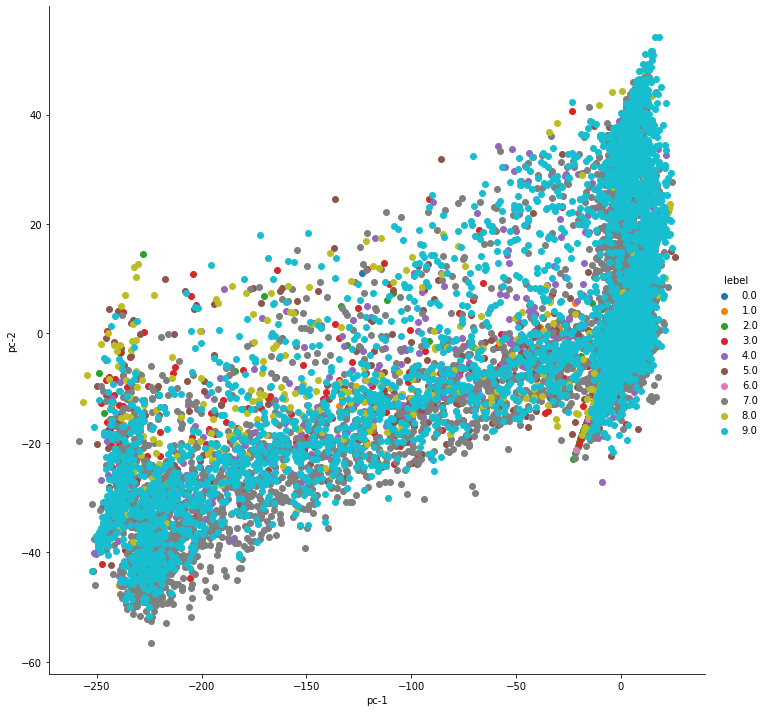

In [155]:
import seaborn as sns
grid = sns.FacetGrid(df, hue="lebel", height=10)
grid.map(plt.scatter, "pc-1", "pc-2").add_legend()